## '유통데이터 서비스 플랫폼'에서 제공하는 데이터를 분석하여 인사이트 찾기

## 우선 제공되는 데이터는 '구매 데이터' 입니다.

이번 유통데이터 활용 경진대회는 데이터분석에 관심있는 누구나 참가하여 자유주제로 유통데이터를 분석해보시면 됩니다.

## 컬럼설명

* **ID** - 구매 건 별 Identifier
* **Order_ID** - 주문번호
* **User_ID** - 사용자 Identifier
* **Purchase_Data** - 구매 날짜
* **Period** - 구매한 주 차 표시
* **Retailer** - 리테일러 (?) **ex) A, B, C**
* **ProductCode** - 마트에서 부여한 상품코드(바코드, 또는 마트 자체에서 부여한 번호)
* **Item_Description** - 상품명
* **Option** - 상품 옵션
* **Sales_Unit** - 상품을 구매한 개수
* **Price** - 상품의 개당 가격
* **Agegroup** - 연령대 **10,20,30,40**
* **Gender** - 성별
* **MasterProductNo** - 매칭된 마스터 상품번호
* **MasterProductName** - 매칭된 마스터 상품명
* **MasterCategoryFullNo** - 마스터 카테고리 코드
* **MasterCategoryFullName** -마스터 카테고리 이름

In [ ]:
# 파이썬의 데이터 분석 패키지
#Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd

 ## Load Dataset

언제나처럼 모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 활용하여 유통데이터의 '카드결제 제공데이터를 불러옵니다.

앞서 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 여기에서도 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

 ## 데이터 전처리

 제공받은 데이터를 보니 지난시간에 배웠던 날짜데이터에 전처리 할 필요성을 느꼈습니다. 일단 해당 데이터는 구매 정보를 분석하는데 목표가 있음으로 년도 그리고 달, 요일 정도까지만 데이터를 나누어 두는 것이 좋을듯 합니다.

In [ ]:
purchase = pd.read_csv("data/Purchase_Transaction.csv",encoding='cp949')
print(purchase. shape)
purchase[["id", "Order_Id","Purchase_Date","Period"]]
purchase['Purchase_Date'] = pd.to_datetime(purchase['Purchase_Date'])
purchase['Purchase_Date-year'] = purchase['Purchase_Date'].dt.year
purchase['Purchase_Date-month'] = purchase['Purchase_Date'].dt.month
purchase['datetime_dayofweek'] = purchase['Purchase_Date'].dt.day_name()
purchase["datetime-dayofweek(int)"] = purchase['Purchase_Date'].dt.dayofweek
purchase.drop(2,inplace=True)
purchase.head()


(39620, 16)


/var/folders/gd/qjvc9t0x0xx1kb9b1zy47vk00000gn/T/ipykernel_1199/2922991914.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  purchase = pd.read_csv("data/Purchase_Transaction.csv",encoding='cp949')


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int)
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,60,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,30,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8801114131466,풀무원 옛두부 300g*2,1,4300,30,M,8801114131466,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1208550099803,프리미엄생연어초밥,2,10000,30,M,1208550099803,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,Monday,0
5,95725,1501590f2e9f4c521f1d6f0337276621,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2500000119125,완숙토마토6~8입/팩,1,5000,30,M,2500000119125,완숙토마토6~8입/팩,C001001300050001,과일->토마토 · 수박 · 참외 · 메론->토마토,2019,9,Monday,0


In [ ]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

In [ ]:
#두번째 열에 있었던 Nan 값을 날렸더니 훨씬 깨끗한 데이터가 된것 같습니다. Agegroup 에 2020으로 표기되었던 내용도 함께 날라 간것을 알 수 있습니다.
#purchase.drop(2,inplace=True)
purchase.head()

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int)
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,60,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,30,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8801114131466,풀무원 옛두부 300g*2,1,4300,30,M,8801114131466,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1208550099803,프리미엄생연어초밥,2,10000,30,M,1208550099803,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,Monday,0
5,95725,1501590f2e9f4c521f1d6f0337276621,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2500000119125,완숙토마토6~8입/팩,1,5000,30,M,2500000119125,완숙토마토6~8입/팩,C001001300050001,과일->토마토 · 수박 · 참외 · 메론->토마토,2019,9,Monday,0


In [ ]:
purchase.shape

(39619, 20)

In [ ]:
#데이터 전처리를 위해서 NaN값의 내용을 확인 합니다. 대체적으로 데이터에 빈 값은 없으나 Gender 컬럼에 NaN 값이 있음을 발견했습니다.
#위의 내용을 적용하니 NaN 값이 없음을 확인했습니다.
purchase.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39619 entries, 0 to 39619
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39619 non-null  int64         
 1   Order_Id                 39619 non-null  object        
 2   User_Id                  39619 non-null  object        
 3   Purchase_Date            39619 non-null  datetime64[ns]
 4   Period                   39619 non-null  int64         
 5   Retailer                 39619 non-null  object        
 6   ProductCode              39619 non-null  object        
 7   Item_Description         39619 non-null  object        
 8   Sales_Unit               39619 non-null  int64         
 9   Price                    39619 non-null  int64         
 10  Agegroup                 39619 non-null  int64         
 11  Gender                   39619 non-null  object        
 12  MasterProdcutNo          39619 n

In [ ]:
purchase[["User_Id", "Agegroup","Gender"]]
#User ID에 중복된 값이 있습니다. 이를 통해 중복된 값은 같은 유저로 이해할 수 있을듯 합니다.
#중복값을 대체할 내용이 있으면 좋겠습니다. 같은 User는 1,2,3 등으로 표기해도 좋을 듯 합니다.

,User_Id,Agegroup,Gender
0,d41d8cd98f00b204e9800998ecf8427e,60,M
1,981ac26310e4d1ab74ae250b71fb1bbe,30,M
3,981ac26310e4d1ab74ae250b71fb1bbe,30,M
4,981ac26310e4d1ab74ae250b71fb1bbe,30,M
5,981ac26310e4d1ab74ae250b71fb1bbe,30,M
...,...,...,...
39615,4f5fe9d41adabc2e193088c8ac032b2b,30,F
39616,4f5fe9d41adabc2e193088c8ac032b2b,30,F
39617,d15d1e2a1a19a48c63809b2b0384110c,30,F
39618,d15d1e2a1a19a48c63809b2b0384110c,30,F


<AxesSubplot:xlabel='Agegroup', ylabel='count'>

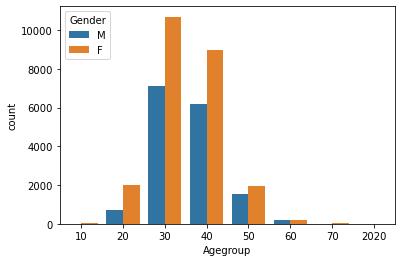

In [ ]:
sns.countplot(data = purchase, x = 'Agegroup', hue = 'Gender')
#여성의 구매력이 강함
#주 구매층은 30~40대임

#그럼 30~40대는 무엇을 주로 구매했을까? #추가 분석 필요 (남.여)

In [ ]:
purchase[["id", "Order_Id","Purchase_Date","Period","Purchase_Date-month" ]]
#ID 와 Order_ID 사이의 상관성이 있어 보입니다. Order ID가 중복되면 ID가 카운트가 되는 듯 합니다.

,id,Order_Id,Purchase_Date,Period,Purchase_Date-month
0,95717,3475eb780c3eeac686a75a00b6b46257,2019-01-18,20190103,1
1,95718,3475eb780c3eeac686a75a00b6b46257,2019-01-18,20190103,1
3,95723,129cb9a1a99323fac25a823772be46bf,2019-09-02,20190136,9
4,95724,64453d5c2038f67ee4b87ed1c1213304,2019-09-02,20190136,9
5,95725,1501590f2e9f4c521f1d6f0337276621,2019-09-02,20190136,9
...,...,...,...,...,...
39615,319285,b367761ed7e08ae7579a8abd995a207c,2020-10-04,20200140,10
39616,319286,b8a663e27de34b1b2781b4675a0fb5df,2020-10-04,20200140,10
39617,319328,a7eb4ce2e0baf052303a62d8774eccb2,2020-10-04,20200140,10
39618,319329,d8895233006e6e8f1ee5ebbb3b5d7728,2020-10-04,20200140,10


<AxesSubplot:xlabel='Purchase_Date-month', ylabel='count'>

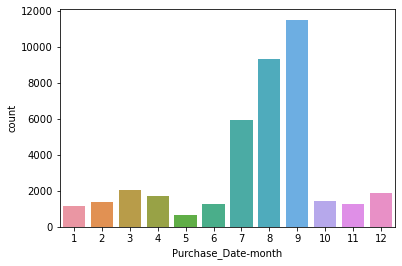

In [ ]:
sns.countplot(data = purchase, x = 'Purchase_Date-month')
#7~9월에 가장 많은 판매건수를 기록
#어떤 물건이 제일 잘 팔렸을까?

## Preprocessing

데이터를 읽어왔으면, 이 데이터를 편하게 분석하고 머신러닝 알고리즘에 집어넣기 위해 간단한 전처리(Preprocessing) 작업을 진행하겠습니다.

In [ ]:
purchase["gmv"] = purchase["Sales_Unit"] * purchase["Price"]
purchase.head()

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date_year,Purchase_Date_month,Purchase_Date_day,Purchase_Date_hour,gmv
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,...,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,18,0,12400
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,...,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,18,0,12400
2,162804,b8b60589fc2a00008f6c746e746cfb04,031ed90cf080a7c468879e1715f5e2a9,2019-01-18,20190103,B,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,...,NaN,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,18,0,12400
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8801114131466,풀무원 옛두부 300g*2,1,4300,...,M,8801114131466,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,2,0,4300
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1208550099803,프리미엄생연어초밥,2,10000,...,M,1208550099803,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,2,0,20000


## Explore

전처리(Preprocesing)를 끝냈으면 그 다음에는 데이터를 분석해보겠습니다.

주어진 데이터를 시각화나 분석 툴을 통해 다양한 관점에서 이해하는 과정을 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))이라고 합니다. 저번 타이타닉 문제와 마찬가지로, 이번에도 파이썬의 데이터 시각화 패키지인 ([matplotlib](https://matplotlib.org))와 [seaborn](https://seaborn.pydata.org/) 을 활용해서 분석해보겠습니다.

In [ ]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

### ID, Order_Id, User_Id

먼저 분석할 컬럼은 **ID, Order_Id, User_Id** 컬럼입니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
purchase["id"].isnull().sum()

0

In [ ]:
purchase["Order_Id"].isnull().sum()

0

In [ ]:
purchase["User_Id"].isnull().sum()

0

### Q1-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Purchase_Date

분석할 컬럼은 **Purchase_Date** 컬럼입니다. 구매 날짜 컬럼은 유통업에 있어서 중요하게 작용할 것 같습니다. 기존 BIKE_SHARING_DEMAND 에서 했던 것 처럼 다양하고 깊은 분석이 다른 인사이트들을 만들 수 있습니다.

### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
purchase["Purchase_Date"].isnull().sum()

0

In [ ]:
purchase["Purchase_Date"] = pd.to_datetime(purchase["Purchase_Date"])

In [ ]:
purchase["Purchase_Date_year"] = purchase["Purchase_Date"].dt.year
purchase["Purchase_Date_month"] = purchase["Purchase_Date"].dt.month
purchase["Purchase_Date_day"] = purchase["Purchase_Date"].dt.day
purchase["Purchase_Date_hour"] = purchase["Purchase_Date"].dt.hour

In [ ]:
purchase[["Purchase_Date", "Purchase_Date_year", "Purchase_Date_month", "Purchase_Date_day", "Purchase_Date_hour"]].head()

,Purchase_Date,Purchase_Date_year,Purchase_Date_month,Purchase_Date_day,Purchase_Date_hour
0,2019-01-18,2019,1,18,0
1,2019-01-18,2019,1,18,0
2,2019-01-18,2019,1,18,0
3,2019-09-02,2019,9,2,0
4,2019-09-02,2019,9,2,0


<AxesSubplot:xlabel='Purchase_Date_hour', ylabel='count'>

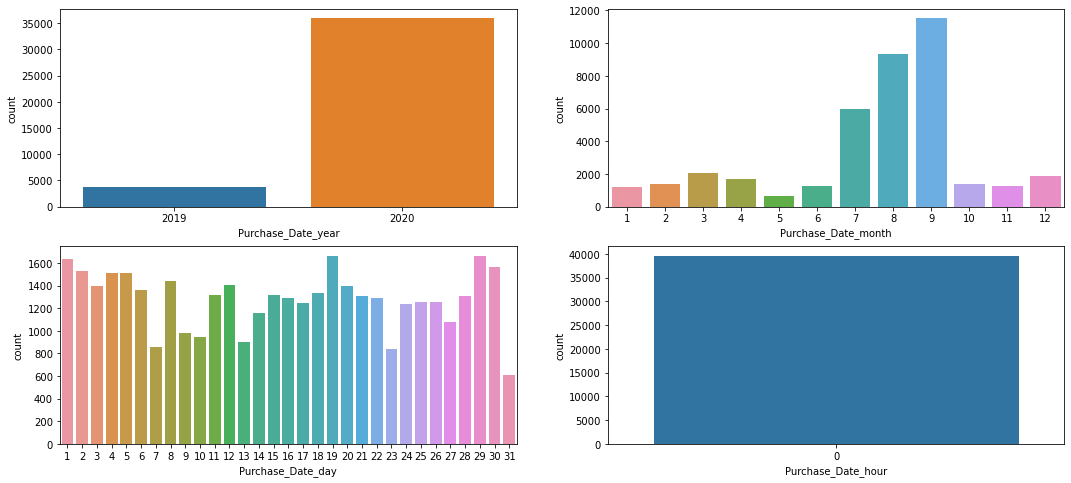

In [ ]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
sns.countplot(data=purchase, x="Purchase_Date_year", ax=ax1)
sns.countplot(data=purchase, x="Purchase_Date_month", ax=ax2)
sns.countplot(data=purchase, x="Purchase_Date_day", ax=ax3)
sns.countplot(data=purchase, x="Purchase_Date_hour", ax=ax4)

In [ ]:
# 연도(datetime-year)와 월(datetime-month)를 앞뒤로 붙인 datetime-year_month라는 이름의 컬럼을 추가합니다.
# 이 컬럼에는 2011년 1월부터 2012년 12월까지 총 24개의 값이 들어가있습니다.
purchase["Purchase_Date_year_month"] = purchase["Purchase_Date_year"].astype('str') + '-' + purchase["Purchase_Date_month"].astype('str')

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(purchase.shape)

# head()로 train 데이터의 datetime과 datetime-year_month컬럼의 상위 5개를 띄웁니다.
purchase[["Purchase_Date", "Purchase_Date_year_month"]].head()

(39620, 22)


,Purchase_Date,Purchase_Date_year_month
0,2019-01-18,2019-1
1,2019-01-18,2019-1
2,2019-01-18,2019-1
3,2019-09-02,2019-9
4,2019-09-02,2019-9


<AxesSubplot:xlabel='Purchase_Date_year_month', ylabel='count'>

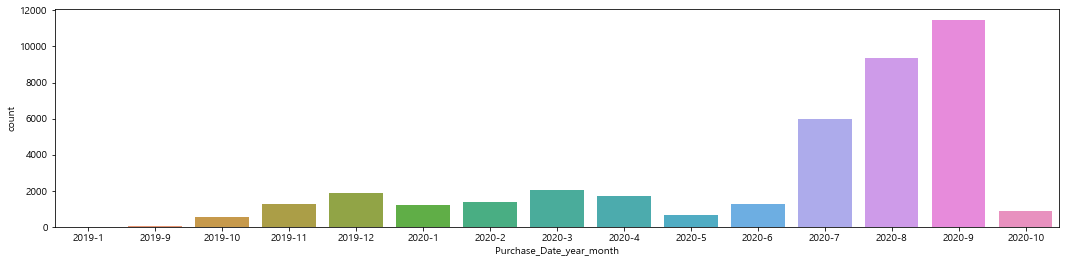

In [ ]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 barplot으로 2011년 1월부터 2012년 12월까지의 자젼거 대여량의 변화량을 시각화합니다.
sns.countplot(data=purchase, x="Purchase_Date_year_month")

### Q2-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 년도 별 데이터를 보았을 때, 2019년에 비해 다음해인 2020년에 7배 가량 증가함을 볼 수 있습니다.

2. 월별로 데이터를 시각화 해본 결과, 여름(7,8,9월)에 집중되고 있음을 알 수 있으며, 겨울에는 상대적으로 구매 횟수가 적습니다. 계절에 따른 결과가 다름에 따라 상품들의 품목과 연관지어 확인해볼 필요가 있고, 5월달의 결과를 조금더 깊게 분석해볼 필요가 있다고 생각합니다.

3. 일자별 분석결과 특정 7일, 9일, 10일, 13일, 23일, 31일 이 낮은 현상을 보이는데 이는 추가적인 분석이 필요해 보임.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Retailer

분석할 컬럼은 **Retailer** 컬럼입니다.

### Q3-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
purchase["Retailer"].isnull().sum()

0

<AxesSubplot:xlabel='Retailer', ylabel='count'>

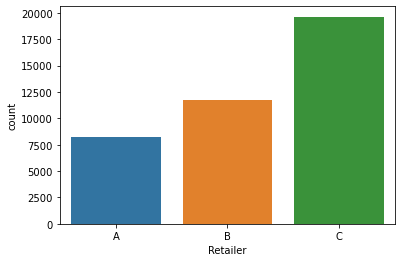

In [ ]:
sns.countplot(data=purchase, x = "Retailer")

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### ProductCode	, Item_Description

분석할 컬럼은 **ProductCode, Item_Description** 컬럼입니다.

### Q4-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
import matplotlib as mpl

In [ ]:
purchase["ProductCode"].isnull().sum()

0

In [ ]:
purchase["ProductCode"].value_counts()

8801043015264    50
2000114666185    42
8808739000108    41
2000000374529    38
2000120108964    37
                 ..
8801051400021     1
8809295813706     1
8809577475202     1
8806185741026     1
8809319273547     1
Name: ProductCode, Length: 24050, dtype: int64

In [ ]:
#높은 순서대로 정렬하고 상위 몇 개만 시각화!
codelist= purchase["ProductCode"].value_counts().index.tolist()

<AxesSubplot:xlabel='count', ylabel='ProductCode'>

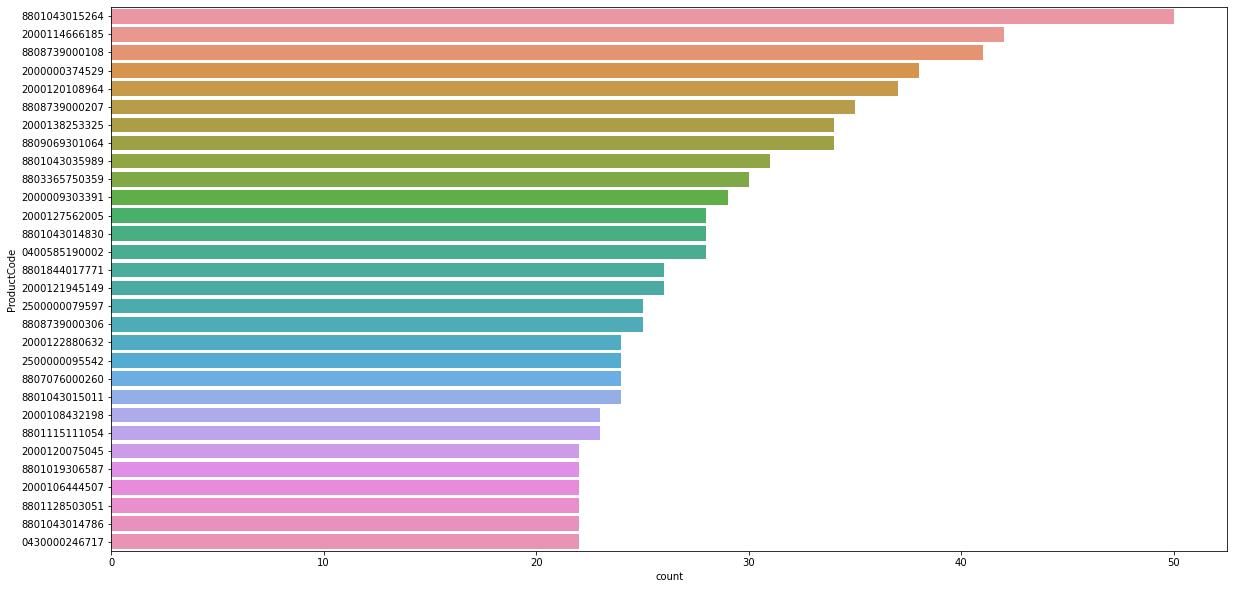

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data=purchase, y = "ProductCode", order=codelist[:30])

In [ ]:
purchase["Item_Description"].isnull().sum()

0

In [ ]:
purchase["Item_Description"].value_counts()

애호박(개)               66
"다이소 균일가 (1,000)"    48
재사용봉투20L             44
올리브짜파게티5입            43
파프리카                 42
                     ..
돌얼음2.5kg              1
베지밀 오트밀두유             1
트레비 워터 500ml*20       1
골든그래놀라크런치             1
코리아보드 개구리 사탕먹기        1
Name: Item_Description, Length: 21686, dtype: int64

In [ ]:
#높은 순서대로 정렬하고 상위 몇 개만 시각화!
productlist= purchase["Item_Description"].value_counts().index.tolist()

<AxesSubplot:xlabel='count', ylabel='Item_Description'>

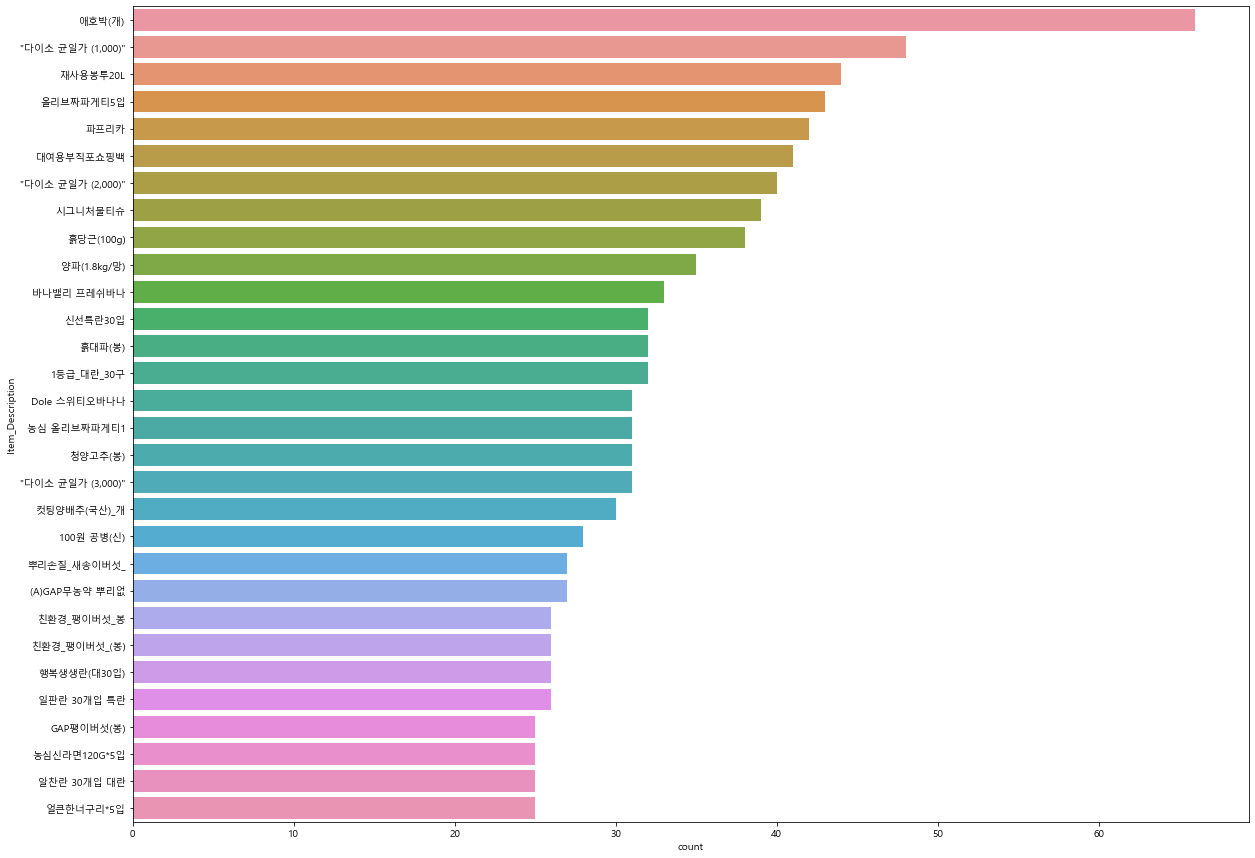

In [ ]:
plt.figure(figsize = (20,15))
mpl.rc("font", family = "Malgun Gothic")
sns.countplot(data=purchase, y = "Item_Description", order=productlist[:30])

### Q4-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Sales_Unit

분석할 컬럼은 **Sales_Unit** 컬럼입니다.

### Q5-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
purchase["Sales_Unit"].value_counts()

1      34778
2       3507
3        558
4        292
5        136
6        111
10        67
8         35
9         24
12        22
7         16
20        12
30         9
15         5
11         4
21         3
13         3
399        2
14         2
28         2
33         2
29         2
23         2
41         2
25         1
19         1
78         1
52         1
120        1
199        1
50         1
85         1
16         1
685        1
72         1
215        1
79         1
45         1
69         1
198        1
40         1
188        1
531        1
693        1
239        1
49         1
65         1
71         1
Name: Sales_Unit, dtype: int64

In [ ]:
salesunitlist= purchase["Sales_Unit"].value_counts().index.tolist()

<AxesSubplot:xlabel='Sales_Unit', ylabel='count'>

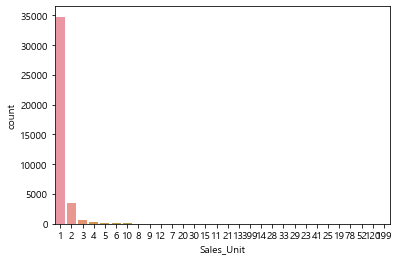

In [ ]:
sns.countplot(data=purchase, x = "Sales_Unit", order=salesunitlist[:30])

### Q5-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Price

분석할 컬럼은 **Price** 컬럼입니다.

### Q6-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
purchase["Price"].value_counts().head(20)

1000     2665
3000     2125
2000     1989
4000     1772
5000     1270
2500     1135
6000     1084
10000     950
8000      890
3500      834
7000      833
1500      682
1200      581
9900      552
2400      550
2800      505
2900      495
3900      495
9000      471
4500      464
Name: Price, dtype: int64

In [ ]:
#이상한 데이터가 존재합니다. 개당 가격이 1억?
purchase["Price"].max()

100001400

In [ ]:
purchase.loc[purchase['Price'] == 100001400]

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date_year,Purchase_Date_month,Purchase_Date_day,Purchase_Date_hour,gmv
39316,317421,daa362c1281c6a13f7691018d8928a07,ebafa77abbc29be90a2c7e2b20cedf1d,2020-10-03,20200140,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001400,...,M,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2020,10,3,0,100001400


In [ ]:
purchase.loc[purchase['Item_Description'] == "새우맛을알아?한판초밥(16입)"]

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date_year,Purchase_Date_month,Purchase_Date_day,Purchase_Date_hour,gmv
2395,142230,daa362c1281c6a13f7691018d8928a07,db271f725386ab9100660cfa5f7d182f,2019-12-13,20190150,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001300,...,F,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,12,13,0,100001300
4016,146860,daa362c1281c6a13f7691018d8928a07,b2289a6d8446384840cadc5b412f032f,2020-01-08,20200102,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001300,...,F,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2020,1,8,0,100001300
39316,317421,daa362c1281c6a13f7691018d8928a07,ebafa77abbc29be90a2c7e2b20cedf1d,2020-10-03,20200140,A,2700000010884,새우맛을알아?한판초밥(16입),1,100001400,...,M,2700000010884,새우맛을알아?한판초밥(16입),C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2020,10,3,0,100001400


### Q6-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

## Agegroup

분석할 컬럼은 **Agegroup** 컬럼입니다. 10, 20, 30, 40

### Q7-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

<AxesSubplot:xlabel='Agegroup', ylabel='count'>

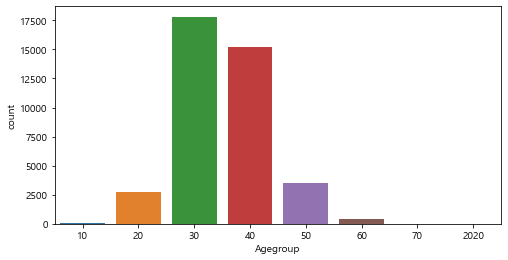

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=purchase, x = "Agegroup")

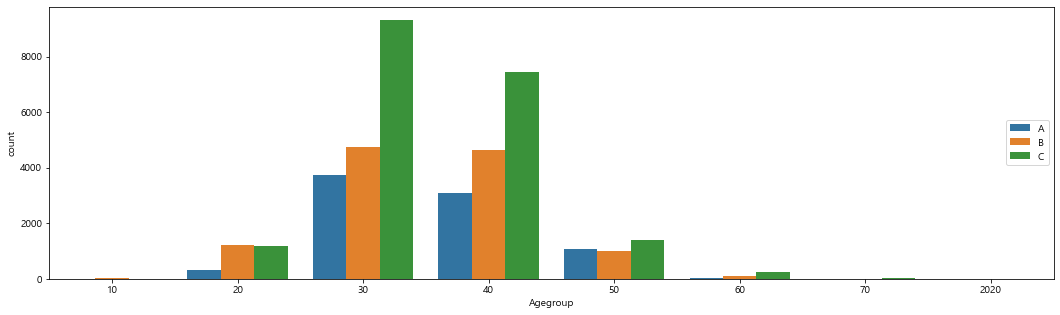

In [ ]:
plt.figure(figsize = (18,5))
sns.countplot(data=purchase, x = "Agegroup", hue="Retailer")
plt.legend(loc = 'right')

### Q7-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

## Gender

분석할 컬럼은 **Gender** 컬럼입니다.

### Q8-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
#빈값이 하나 있으므로 없애 주는것이 좋을 것 같습니다.
purchase["Gender"].isnull().sum()

1

<AxesSubplot:xlabel='Gender', ylabel='count'>

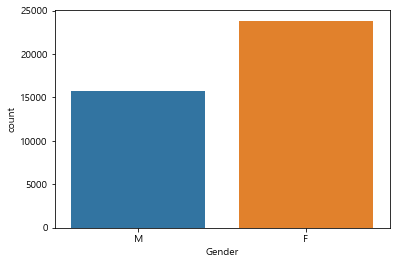

In [ ]:
sns.countplot(data=purchase, x = "Gender")

<AxesSubplot:xlabel='Gender', ylabel='count'>

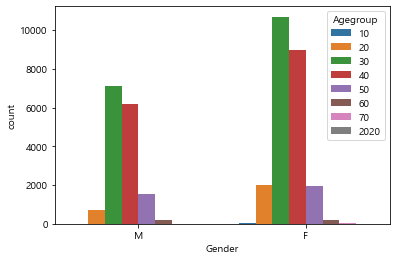

In [ ]:
sns.countplot(data=purchase, x = "Gender", hue="Agegroup")

<AxesSubplot:xlabel='Gender', ylabel='count'>

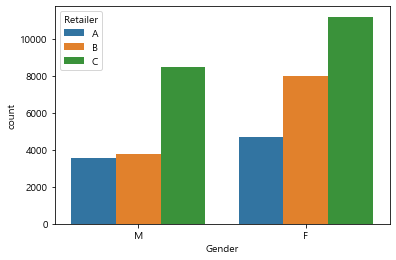

In [ ]:
sns.countplot(data=purchase, x = "Gender", hue="Retailer")

### Q8-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

## MasterProdcutNo, MasterProdcutName

분석할 컬럼은 **MasterProdcutNo, MasterProdcutName** 컬럼입니다.

### Q9-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.


2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
#write your code!

### Q9-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

## MasterCategoryFullNo, MasterCategoryFullName

분석할 컬럼은 **MasterCategoryFullNo, MasterCategoryFullName** 컬럼입니다.

### Q10-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주내용은 반드시** 시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1.

2.

3.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [ ]:
#write your code!

### Q10-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1.

2.

3.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

In [ ]:
import pandas as pd
import numpy as np